In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [149]:
df=pd.read_csv(r"C:\Users\user\Downloads\kddcup99_csv.csv")
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [150]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [151]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [153]:
df.describe(include='object')

,protocol_type,service,flag,label
count,494020,494020,494020,494020
unique,3,66,11,23
top,icmp,ecr_i,SF,smurf
freq,283602,281400,378439,280790


In [154]:
df.shape

(494020, 42)

In [155]:
df.duplicated().sum()

348435

In [156]:
#finding out the percentage of duplicate records
def duplicate_records(df):
    all_data=len(df)
    duplicated_data=(df.duplicated().sum())
    dup_percentage=(duplicated_data/all_data)*100
    return dup_percentage
percentage_dup=duplicate_records(df)
percentage_dup

70.53054532205174

Given the high percentage of duplicates we will try other methods of removing them.

In [157]:
df['label'].value_counts()

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

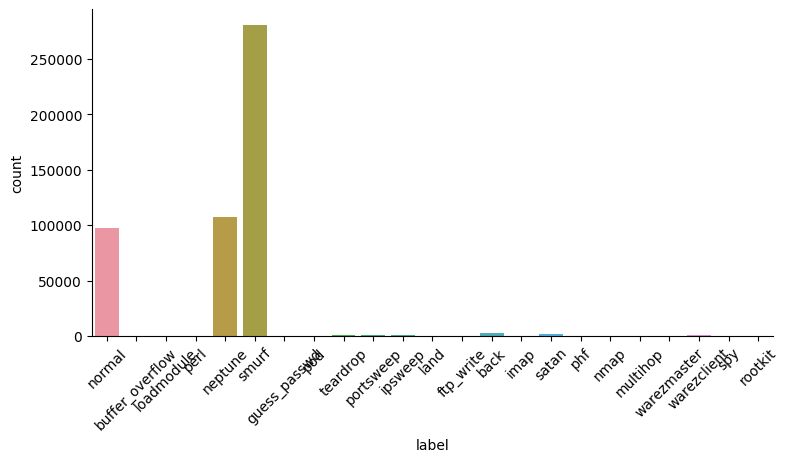

In [158]:
g = sns.catplot(data=df, kind='count', x='label', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

In [159]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


VISUALIZATIONS

In [160]:
df.select_dtypes('object').columns

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')

<Figure size 2000x300 with 0 Axes>

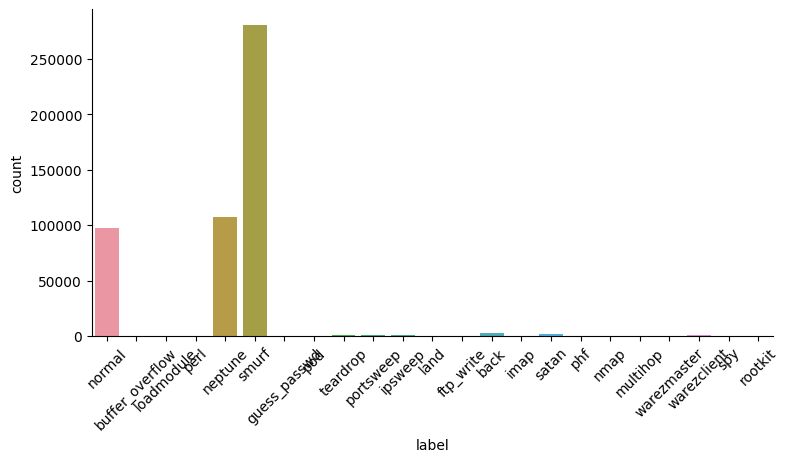

In [161]:
plt.figure(figsize=(20,3))
g = sns.catplot(data=df, kind='count', x='label', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

In [162]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")


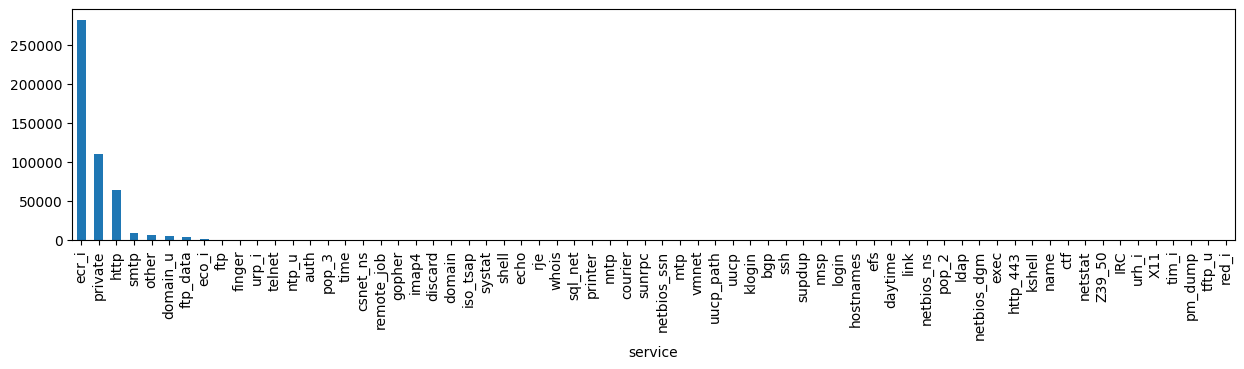

In [163]:
plt.figure(figsize=(15,3))
bar_graph('service')

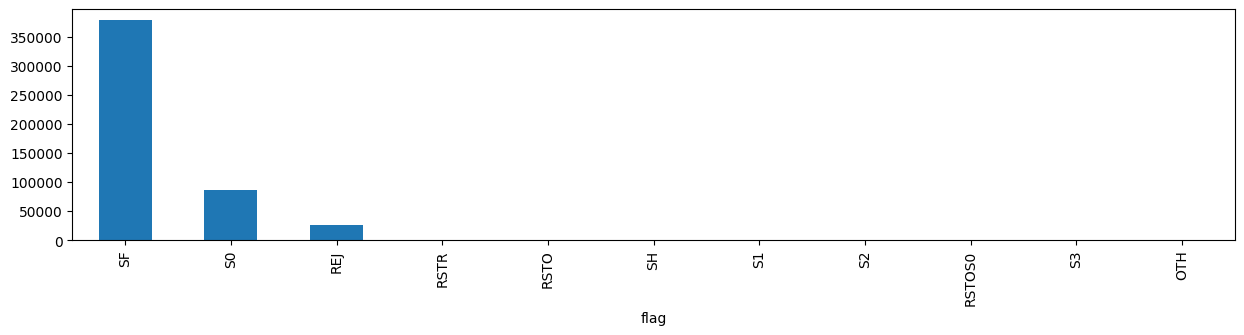

In [164]:
plt.figure(figsize=(15,3))
bar_graph('flag')

In [165]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [166]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('label')

cate_cols

['flag', 'protocol_type', 'service']

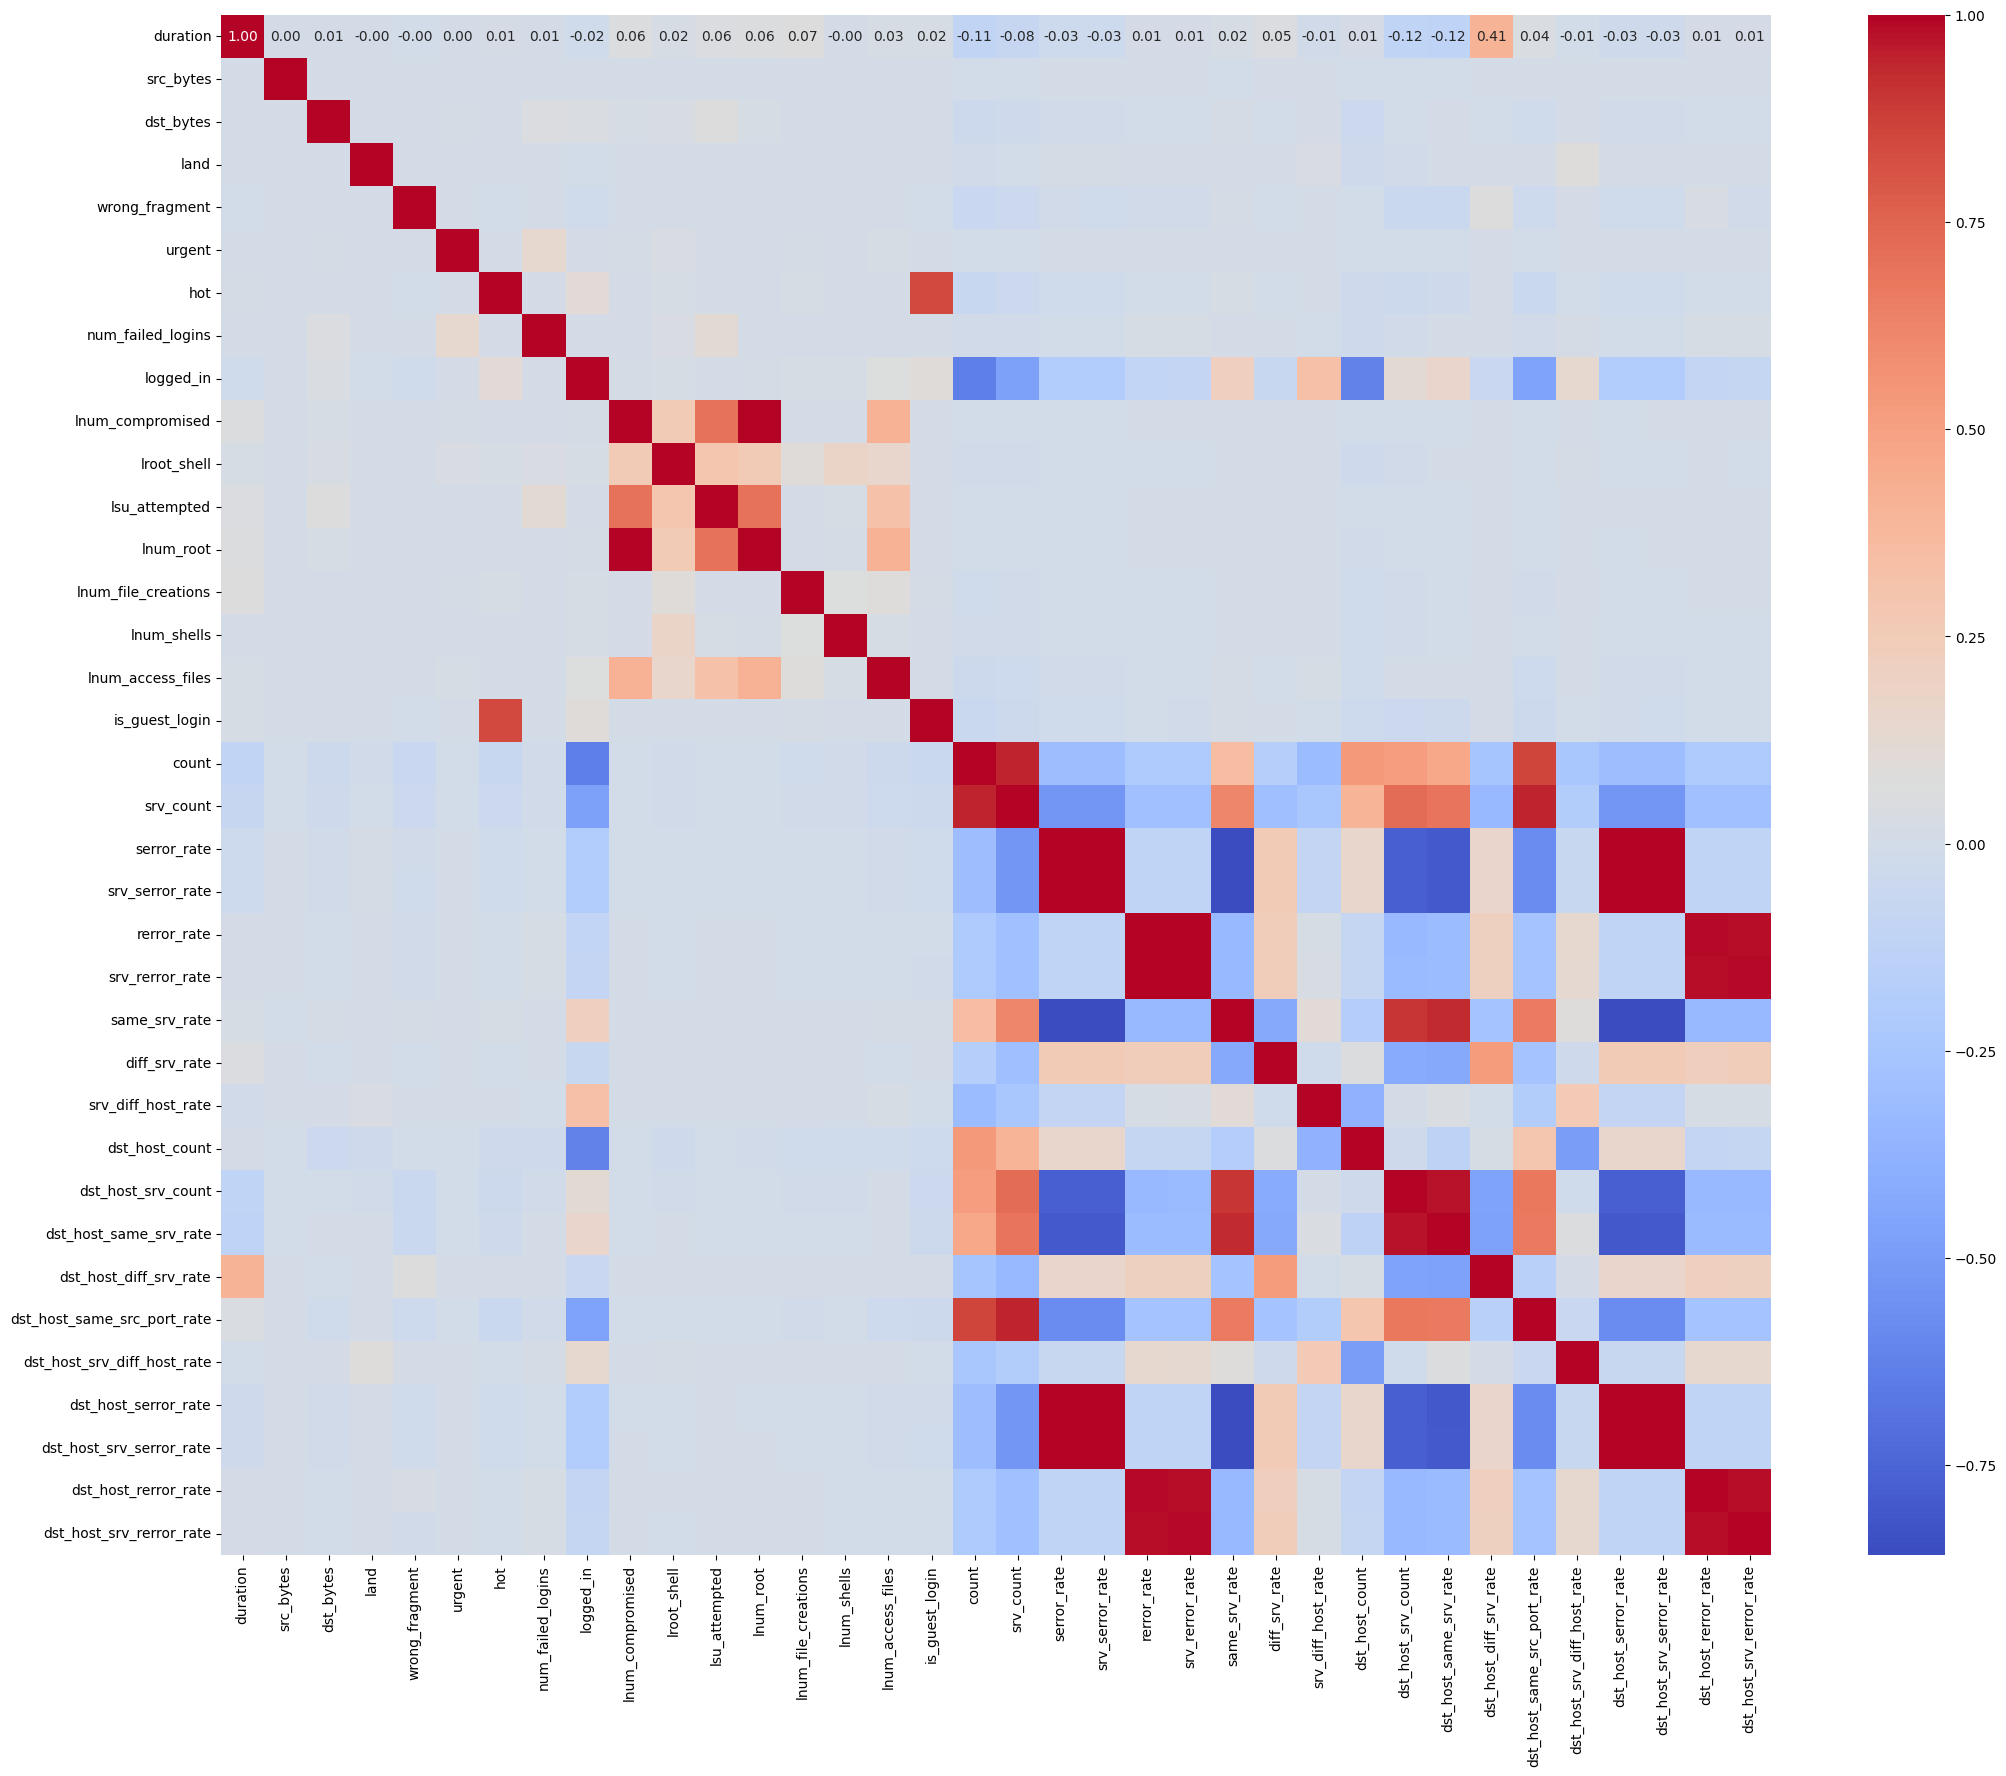

In [167]:
df=df.dropna()
num_df = df[[col for col in num_cols if df[col].nunique() > 1]]
corr=num_df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [168]:
# To get pairs of columns with a correlation higher than 0.9
corr_matrix=num_df.corr()
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range (i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j],corr_matrix.iloc[i, j]))
#display pairs with correlation higher than 0.9
for pair in high_corr_pairs:
    print(f"Correlation between '{pair[0]}' and '{pair[1]}': {pair[2]}")

Correlation between 'lnum_compromised' and 'lnum_root': 0.9938277978733956
Correlation between 'count' and 'srv_count': 0.9436670187138742
Correlation between 'srv_count' and 'dst_host_same_src_port_rate': 0.9449262161777623
Correlation between 'serror_rate' and 'srv_serror_rate': 0.9983615065593786
Correlation between 'serror_rate' and 'dst_host_serror_rate': 0.9986729674316287
Correlation between 'serror_rate' and 'dst_host_srv_serror_rate': 0.9978492476329098
Correlation between 'srv_serror_rate' and 'dst_host_serror_rate': 0.9978352994314563
Correlation between 'srv_serror_rate' and 'dst_host_srv_serror_rate': 0.999304108882672
Correlation between 'rerror_rate' and 'srv_rerror_rate': 0.9947309533247035
Correlation between 'rerror_rate' and 'dst_host_rerror_rate': 0.9869947908669967
Correlation between 'rerror_rate' and 'dst_host_srv_rerror_rate': 0.9851995522241864
Correlation between 'srv_rerror_rate' and 'dst_host_rerror_rate': 0.9821663404802431
Correlation between 'srv_rerror_r

In [169]:
#columns to drop which are highly correlated
cols_to_drop=['srv_serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','srv_rerror_rate','dst_host_rerror_rate','lnum_root']
df=df.drop(columns=cols_to_drop)

In [170]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,normal


Applying Standardization and normalization

In [171]:
#Finding categorical features
y=df['label']
x=df.drop(['label',], axis=1)

num_cols = x._get_numeric_data().columns

cate_cols = list(set(x.columns)-set(num_cols))

cate_cols

['flag', 'protocol_type', 'service']

In [172]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[num_cols]=scaler.fit_transform(x[num_cols])

In [173]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
scaler_minmax=MinMaxScaler()
x[num_cols]=scaler_minmax.fit_transform(x[num_cols])

In [174]:
# Apply one-hot encoding to categorical columns
encoder= OneHotEncoder()
encoded_data=encoder.fit_transform(x[cate_cols])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cate_cols))
x = pd.concat([x[num_cols], encoded_df], axis=1)

In [175]:
x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODELLING

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score

In [177]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [178]:
print(X_train.shape, X_test.shape)

(330993, 112) (163027, 112)


GAUSSIAN NAIVE BAYES 

In [179]:
from sklearn.naive_bayes import GaussianNB
import time

In [180]:
model1=GaussianNB()
start_time=time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time= time.time()

In [181]:
print("Training time:", end_time-start_time)

Training time: 1.8465237617492676


In [182]:
model1.predict(X_test)
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:", model1.score(X_test,Y_test))

Train score is: 0.7243808781454593
Test score is: 0.7256589399301956


DECISION TREE

In [183]:
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [184]:
model2.fit(X_train,Y_train.values.ravel())
model2.predict(X_test)
print("Train score is: " ,model2.score(X_train, Y_train))
print("Test score is: ",model2.score(X_test,Y_test))

Train score is:  0.9882021674174378
Test score is:  0.9877934329896275


RANDOM FOREST, SUPPORT VECTOR MACHINE, LOGISTIC REGRESSION AND GRADIENT BOOSTING CLASSIFIER

In [185]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

ARTIFICIAL NEURAL NETWORK

In [186]:
import tensorflow as tf

In [223]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import Metric
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [224]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='softmax'),
])

In [225]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [226]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                7232      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 128)               8320      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_98 (Dense)            (None, 512)               66048     
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_99 (Dense)            (None, 128)             

In [227]:
Y_test.info()

<class 'pandas.core.series.Series'>
Index: 163027 entries, 317920 to 443166
Series name: label
Non-Null Count   Dtype 
--------------   ----- 
163027 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [228]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for both train and test sets
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

In [229]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10, verbose=1)

Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10342/10344 [============================>.] - ETA: 0s - loss: -20610330624.0000 - accuracy: 5.1368e-05

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10344/10344 [==============================] - 135s 13ms/step - loss: -20616529920.0000 - accuracy: 5.1361e-05 - val_loss: -57192308736.0000 - val_accuracy: 7.9741e-05
Epoch 2/10
10344/10344 [==============================] - 190s 18ms/step - loss: -117808873472.0000 - accuracy: 5.1361e-05 - val_loss: -195666608128.0000 - val_accuracy: 7.9741e-05
Epoch 3/10
10344/10344 [==============================] - 188s 18ms/step - loss: -291638018048.0000 - accuracy: 5.1361e-05 - val_loss: -410497089536.0000 - val_accuracy: 7.9741e-05
Epoch 4/10
10344/10344 [==============================] - 190s 18ms/step - loss: -539985248256.0000 - accuracy: 5.1361e-05 - val_loss: -700652257280.0000 - val_accuracy: 7.9741e-05
Epoch 5/10
10344/10344 [==============================] - 200s 19ms/step - loss: -862117429248.0000 - accuracy: 5.1361e-05 - val_loss: -1066331013120.0000 - val_accuracy: 7.9741e-05
Epoch 6/10
10344/10344 [==============================] - 174s 17ms/step - loss: -1258016735232.0000 - accu

In [230]:
def evaluate_model(model):
    _, train_acc = model.evaluate(X_train, y_train_encoded, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    return None

In [231]:
evaluate_model(model)

Train: 0.000, Test: 0.000
